In [29]:
from pycaret.datasets import get_data
from pycaret.classification import *
import warnings
warnings.filterwarnings('ignore')

In [30]:
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [3]:
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [4]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


In [5]:
exp_clf101 = setup(data = data, target = 'default', session_id=123, silent=True) 

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22800, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8254,0.0000,0.3637,0.6913,0.4764,0.3836,0.4122,0.0220
lda,Linear Discriminant Analysis,0.8247,0.7634,0.3755,0.6794,0.4835,0.3884,0.4132,0.1800
gbc,Gradient Boosting Classifier,0.8226,0.7789,0.3551,0.6806,0.4664,0.3725,0.4010,0.6330
ada,Ada Boost Classifier,0.8221,0.7697,0.3505,0.6811,0.4626,0.3690,0.3983,0.1610
lightgbm,Light Gradient Boosting Machine,0.8210,0.7750,0.3609,0.6679,0.4683,0.3721,0.3977,0.0480
rf,Random Forest Classifier,0.8199,0.7598,0.3663,0.6601,0.4707,0.3727,0.3965,0.3420
et,Extra Trees Classifier,0.8092,0.7377,0.3677,0.6047,0.4571,0.3497,0.3657,0.3270
lr,Logistic Regression,0.7814,0.6410,0.0003,0.1000,0.0006,0.0003,0.0034,0.4530
knn,K Neighbors Classifier,0.7547,0.5939,0.1763,0.3719,0.2388,0.1145,0.1259,0.2140
dt,Decision Tree Classifier,0.7293,0.6147,0.4104,0.3878,0.3986,0.2242,0.2245,0.1830


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

In [7]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7343,0.6257,0.4327,0.4005,0.4160,0.2444,0.2447
1,0.7325,0.6277,0.4384,0.3984,0.4175,0.2443,0.2448
2,0.7431,0.6282,0.4241,0.4146,0.4193,0.2544,0.2544
3,0.7274,0.6151,0.4155,0.3856,0.4000,0.2240,0.2242
4,0.7187,0.6054,0.4040,0.3691,0.3858,0.2038,0.2042
5,0.7187,0.6014,0.3897,0.3656,0.3773,0.1958,0.1960
6,0.7206,0.6128,0.4212,0.3760,0.3973,0.2162,0.2168
7,0.7331,0.5986,0.3610,0.3830,0.3717,0.2024,0.2026
8,0.7206,0.6045,0.3983,0.3707,0.3840,0.2036,0.2038
9,0.7442,0.6272,0.4195,0.4148,0.4171,0.2533,0.2533


In [8]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [9]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7469,0.6020,0.1920,0.3545,0.2491,0.1128,0.1204
1,0.7550,0.5894,0.2092,0.3883,0.2719,0.1402,0.1500
2,0.7506,0.5883,0.1576,0.3459,0.2165,0.0923,0.1024
3,0.7419,0.5818,0.1519,0.3136,0.2046,0.0723,0.0790
4,0.7563,0.5908,0.1490,0.3611,0.2110,0.0954,0.1085
5,0.7550,0.5997,0.1748,0.3720,0.2378,0.1139,0.1255
6,0.7638,0.5890,0.1891,0.4125,0.2593,0.1413,0.1565
7,0.7613,0.6240,0.1633,0.3904,0.2303,0.1163,0.1318
8,0.7619,0.5988,0.1862,0.4037,0.2549,0.1356,0.1500
9,0.7549,0.5756,0.1897,0.3771,0.2524,0.1246,0.1351


In [10]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8133,0.7673,0.3610,0.6269,0.4582,0.3551,0.3749
1,0.8239,0.7615,0.3782,0.6735,0.4844,0.3882,0.4117
2,0.8258,0.7708,0.3467,0.7076,0.4654,0.3756,0.4098
3,0.8177,0.7605,0.3725,0.6436,0.4719,0.3710,0.3913
4,0.8208,0.7642,0.3725,0.6599,0.4762,0.3780,0.4006
5,0.8283,0.7638,0.3954,0.6866,0.5018,0.4070,0.4297
6,0.8127,0.7647,0.3582,0.6250,0.4554,0.3522,0.3721
7,0.8283,0.7390,0.3553,0.7168,0.4751,0.3861,0.4202
8,0.8108,0.7496,0.3610,0.6146,0.4549,0.3496,0.3678
9,0.8176,0.7565,0.3621,0.6462,0.4641,0.3645,0.3867


In [11]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8177,0.7475,0.3095,0.6835,0.4260,0.3355,0.3728
1,0.8289,0.7711,0.3381,0.7375,0.4637,0.3782,0.4190
2,0.8208,0.7377,0.2894,0.7266,0.4139,0.3305,0.3796
3,0.8252,0.7580,0.3152,0.7333,0.4409,0.3563,0.4010
4,0.8195,0.7545,0.3095,0.6968,0.4286,0.3398,0.3794
5,0.8271,0.7509,0.3438,0.7186,0.4651,0.3769,0.4134
6,0.8195,0.7488,0.3123,0.6943,0.4308,0.3415,0.3801
7,0.8246,0.7529,0.2980,0.7482,0.4262,0.3446,0.3957
8,0.8195,0.7241,0.3123,0.6943,0.4308,0.3415,0.3801
9,0.8188,0.7378,0.3075,0.6903,0.4254,0.3362,0.3751


In [12]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [13]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7820,0.6516,0.0315,0.5238,0.0595,0.0355,0.0852
1,0.7807,0.6482,0.0287,0.4762,0.0541,0.0300,0.0719
2,0.7794,0.6584,0.0287,0.4348,0.0538,0.0275,0.0632
3,0.7820,0.6573,0.0487,0.5152,0.0890,0.0532,0.1042
4,0.7807,0.6742,0.0201,0.4667,0.0385,0.0208,0.0584
5,0.7813,0.6488,0.0430,0.5000,0.0792,0.0461,0.0942
6,0.7845,0.6278,0.0401,0.6087,0.0753,0.0496,0.1141
7,0.7788,0.6737,0.0315,0.4231,0.0587,0.0292,0.0636
8,0.7813,0.6396,0.0544,0.5000,0.0982,0.0577,0.1063
9,0.7875,0.6420,0.0460,0.6957,0.0863,0.0608,0.1398


In [14]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8158,0.7508,0.3181,0.6647,0.4302,0.3363,0.3689
1,0.8283,0.7675,0.3295,0.7419,0.4563,0.3719,0.4152
2,0.8139,0.7337,0.3181,0.6529,0.4277,0.3321,0.3628
3,0.8246,0.7588,0.3095,0.7347,0.4355,0.3514,0.3976
4,0.8170,0.7567,0.3438,0.6557,0.4511,0.3539,0.3805
5,0.8258,0.7506,0.3324,0.7205,0.4549,0.3676,0.4067
6,0.8170,0.7530,0.3324,0.6629,0.4427,0.3474,0.3771
7,0.8221,0.7507,0.3381,0.6901,0.4538,0.3621,0.3951
8,0.8177,0.7201,0.2980,0.6933,0.4168,0.3286,0.3699
9,0.8207,0.7484,0.3132,0.6987,0.4325,0.3439,0.3831


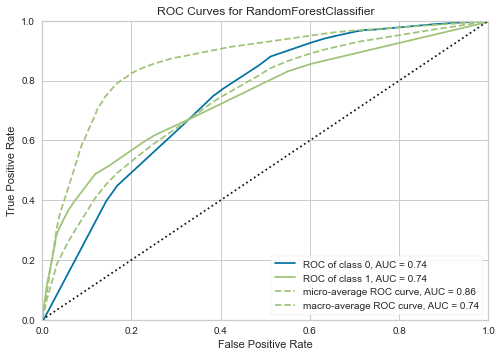

In [15]:
plot_model(tuned_rf, plot = 'auc')

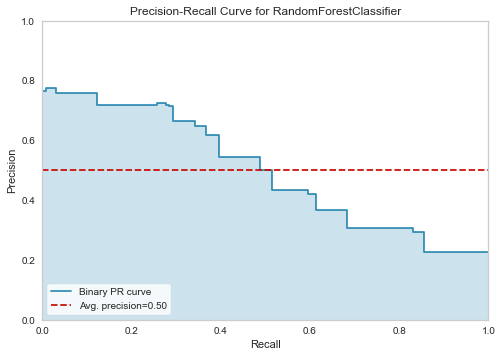

In [16]:
plot_model(tuned_rf, plot = 'pr')

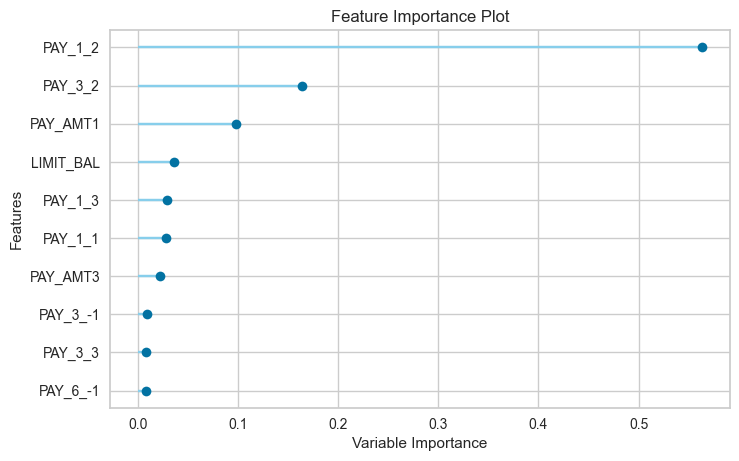

In [17]:
plot_model(tuned_rf, plot='feature')

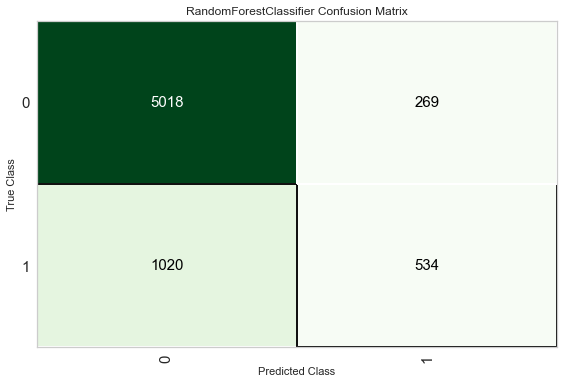

In [18]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [19]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8116,0.7407,0.3436,0.6650,0.4531,0.3530,0.3811


In [20]:
final_rf = finalize_model(tuned_rf)

In [21]:
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [22]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8184,0.7526,0.3533,0.6985,0.4692,0.3736,0.4053


In [23]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,50000,2,2,1,48,0,0,0,0,0,...,8011.0,2028.0,2453.0,2329.0,431.0,300.0,500.0,0,0,0.8603
1,200000,2,1,1,40,2,2,2,2,2,...,89112.0,4200.0,4100.0,3000.0,3400.0,3500.0,0.0,1,1,0.7911
2,50000,2,3,1,44,1,2,3,2,4,...,15798.0,2100.0,1000.0,2300.0,0.0,0.0,0.0,1,0,0.6193
3,60000,2,2,1,31,2,2,-1,0,0,...,30384.0,1132.0,60994.0,1436.0,1047.0,1056.0,1053.0,1,1,0.6781
4,120000,2,3,2,32,-1,0,0,0,0,...,81354.0,2429.0,3120.0,3300.0,10000.0,3200.0,3200.0,0,0,0.9121


In [24]:
save_model(final_rf,'Final RF Model 02Nov2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_features=1.0,
                                         max_leaf_

In [25]:
saved_final_rf = load_model('Final RF Model 02Nov2021')

Transformation Pipeline and Model Successfully Loaded


In [26]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [27]:
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,50000,2,2,1,48,0,0,0,0,0,...,8011.0,2028.0,2453.0,2329.0,431.0,300.0,500.0,0,0,0.8603
1,200000,2,1,1,40,2,2,2,2,2,...,89112.0,4200.0,4100.0,3000.0,3400.0,3500.0,0.0,1,1,0.7911
2,50000,2,3,1,44,1,2,3,2,4,...,15798.0,2100.0,1000.0,2300.0,0.0,0.0,0.0,1,0,0.6193
3,60000,2,2,1,31,2,2,-1,0,0,...,30384.0,1132.0,60994.0,1436.0,1047.0,1056.0,1053.0,1,1,0.6781
4,120000,2,3,2,32,-1,0,0,0,0,...,81354.0,2429.0,3120.0,3300.0,10000.0,3200.0,3200.0,0,0,0.9121
